Mean Squared Error: 0.0030
R² Score: 0.9050

Model Coefficients (Standardized Features):
avg_daily_calories: 0.0666
total_days_training: 0.1132


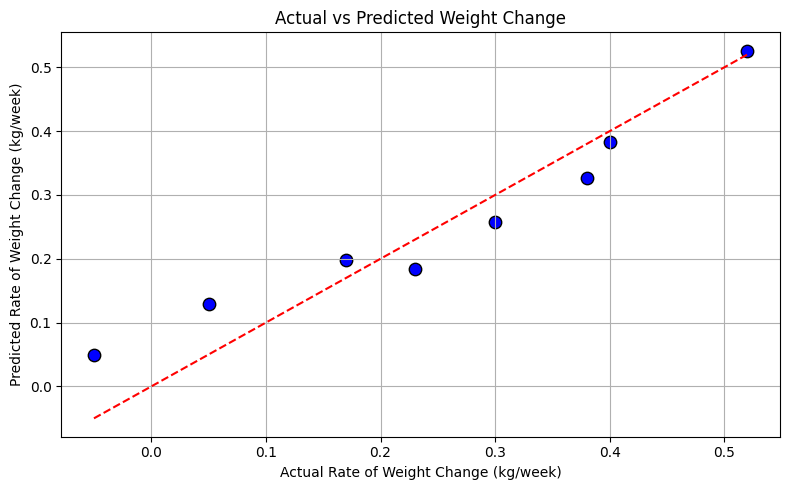

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Create sample dataset
data = {
    "avg_daily_calories": [
        2550, 2650, 2500, 2700, 2600, 2750, 2450, 2800, 2900, 2400,
        2650, 2750, 2600, 2850, 2700, 2950, 2550, 3000, 3100, 2500,
        2750, 2850, 2700, 2950, 2800, 3050, 2650, 3100, 3200, 2600,
        2850, 2950, 2800, 3000, 2900, 3100, 2750, 3150, 3250, 2700
    ],
    "total_days_training": [
        100, 110, 90, 120, 105, 130, 85, 140, 150, 80,
        112, 122, 102, 132, 107, 137, 97, 142, 152, 87,
        115, 125, 105, 135, 110, 145, 95, 150, 160, 100,
        120, 130, 110, 140, 115, 150, 105, 155, 165, 108
    ],
    "rate_kg_per_week": [
        0.10, 0.25, -0.05, 0.30, 0.20, 0.35, -0.10, 0.40, 0.45, -0.15,
        0.22, 0.32, 0.18, 0.37, 0.25, 0.42, 0.12, 0.48, 0.50, -0.08,
        0.30, 0.38, 0.23, 0.43, 0.28, 0.47, 0.15, 0.52, 0.55, 0.05,
        0.35, 0.40, 0.26, 0.45, 0.32, 0.50, 0.20, 0.53, 0.58, 0.17
    ]
}

df = pd.DataFrame(data)

# 2. Select features (X) and target (y)
X = df[["avg_daily_calories", "total_days_training"]]
y = df["rate_kg_per_week"]

# 3. Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4. Standardize features
# Fit the scaler only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Only transform test data (using same mean/std)

# 5. Train linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 6. Predict on test data
y_pred = model.predict(X_test_scaled)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# 8. Display model coefficients for each feature
print("\nModel Coefficients (Standardized Features):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# 9. Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Rate of Weight Change (kg/week)")
plt.ylabel("Predicted Rate of Weight Change (kg/week)")
plt.title("Actual vs Predicted Weight Change")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# 10. Predict weight change for a new week
# Define new week's features (example)
new_week_features = {
    "avg_daily_calories": 1935,
    "total_days_training": 115
}

# Convert to DataFrame (model expects 2D input)
new_week_df = pd.DataFrame([new_week_features])

# Standardize new input using existing scaler (do NOT refit!)
new_week_scaled = scaler.transform(new_week_df)

# Predict
predicted_rate = model.predict(new_week_scaled)
print(f"\nPredicted rate of weight gain (kg/week): {predicted_rate[0]:.3f}")


Predicted rate of weight gain (kg/week): 0.000


In [82]:
# Example baseline features
base_features = {
    "total_days_training": 115
}

# Try a range of calorie values to find where predicted rate is ~ 0
calorie_range = range(2000, 4000, 10)  # Try from 2000 to 4000 in steps of 10
maintenance_results = []

for cal in calorie_range:
    # Combine into one dictionary
    input_features = {
        "avg_daily_calories": cal,
        **base_features
    }
    
    # Convert to DataFrame and scale
    input_df = pd.DataFrame([input_features])
    input_scaled = scaler.transform(input_df)

    # Predict rate of weight change
    predicted_rate = model.predict(input_scaled)[0]
    maintenance_results.append((cal, predicted_rate))

# Find calorie value where rate is closest to 0
maintenance_calories = min(maintenance_results, key=lambda x: abs(x[1]))
print(f"Estimated Maintenance Calories: {maintenance_calories[0]} kcal/day")
print(f"Predicted Rate at This Intake: {maintenance_calories[1]:.4f} kg/week")


Estimated Maintenance Calories: 2000 kcal/day
Predicted Rate at This Intake: 0.0199 kg/week


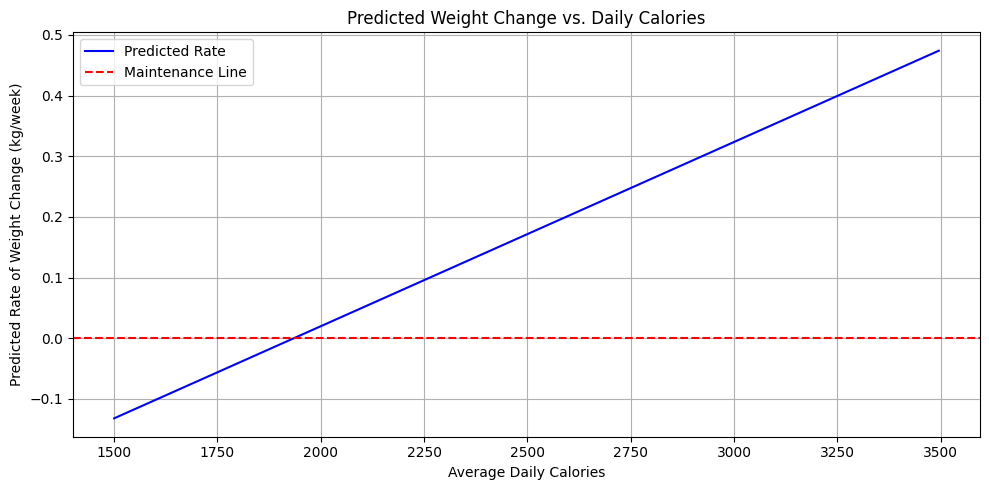

Estimated Maintenance Calories: 1935 kcal/day
Predicted Rate: 0.0002 kg/week


In [9]:
# Define constant features (based on your current activity)
base_features = {
    "total_days_training": 115
}

# Range of daily calories to test
calorie_range = range(1500, 3500, 5)
calories_list = []
predicted_rates = []

for cal in calorie_range:
    input_features = {
        "avg_daily_calories": cal,
        **base_features
    }
    input_df = pd.DataFrame([input_features])
    input_scaled = scaler.transform(input_df)
    predicted_rate = model.predict(input_scaled)[0]

    calories_list.append(cal)
    predicted_rates.append(predicted_rate)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(calories_list, predicted_rates, color='blue', label='Predicted Rate')
plt.axhline(0, color='red', linestyle='--', label='Maintenance Line')
plt.xlabel("Average Daily Calories")
plt.ylabel("Predicted Rate of Weight Change (kg/week)")
plt.title("Predicted Weight Change vs. Daily Calories")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print estimated maintenance calories
closest_idx = min(range(len(predicted_rates)), key=lambda i: abs(predicted_rates[i]))
print(f"Estimated Maintenance Calories: {calories_list[closest_idx]} kcal/day")
print(f"Predicted Rate: {predicted_rates[closest_idx]:.4f} kg/week")
